In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Basic Info

In [2]:
train_df = pd.read_csv("option_train.csv")

In [6]:
train_df.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420,0.341270,0.03013,Under
1,0.125000,427.015526,465,0.166667,0.03126,Over
2,20.691244,427.762336,415,0.265873,0.03116,Under
3,1.035002,451.711658,460,0.063492,0.02972,Over
4,39.553020,446.718974,410,0.166667,0.02962,Under


In [4]:
train_df.shape

(1680, 6)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1680 non-null   float64
 1   S       1680 non-null   float64
 2   K       1680 non-null   int64  
 3   tau     1680 non-null   float64
 4   r       1680 non-null   float64
 5   BS      1680 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 78.9+ KB


In [7]:
test_df = pd.read_csv("option_test_wolabel.csv")

In [8]:
test_df.head()

,S,K,tau,r
0,431.618600,460,0.293651,0.03147
1,432.633296,420,0.182540,0.03147
2,432.633296,430,0.182540,0.03147
3,431.618600,415,0.293651,0.03147
4,434.772855,420,0.043651,0.03147


In [9]:
test_df.shape

(1120, 4)

In [12]:
print(f"Number of Nulls in train: {train_df.isnull().sum().sum()}")
print(f"Number of Nulls in test: {test_df.isnull().sum().sum()}")

Number of Nulls in train: 0
Number of Nulls in test: 0


## Univariate EDA

In [30]:
# BS

train_df["BS"].value_counts()

Under    946
Over     734
Name: BS, dtype: int64

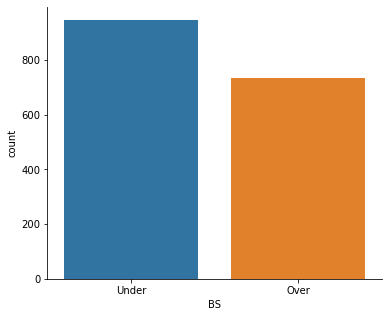

In [28]:
fig, ax = plt.subplots(figsize=(6,5))

sns.countplot(data=train_df, x="BS", ax=ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

AttributeError: module 'seaborn' has no attribute 'histplot'

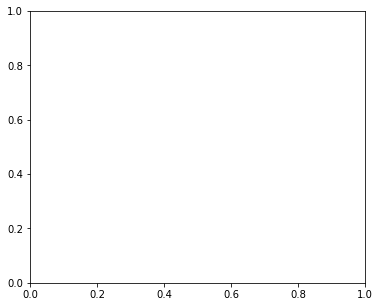

In [31]:
# Target

fig, ax = plt.subplots(figsize=(6,5))

sns.histplot(data=train_df, x="BS", ax=ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()